I collected 1,000 records from Web of Science related to biodiversity. I want to explore how to quickly identify topics within the sample with the eventual goal of mapping these topics across a world map.

In [2]:

import pandas as pd

data=pd.read_csv("Dataset for Class.csv",
                 usecols=['Article Title','Source Title','Author Keywords','Abstract','Addresses','Times Cited, All Databases'])
print(data)

                                         Article Title  \
0    Land enrolled in the Conservation Reserve Prog...   
1    Fish Biodiversity Conservation and Restoration...   
2    Operationalizing ecological connectivity in sp...   
3    Spatial conservation planning with ecological ...   
4    A landscape index of ecological integrity to i...   
..                                                 ...   
995            Disturbance Ecology in the Anthropocene   
996  Integrating socio-ecological dynamics into lan...   
997  Persistence through tough times: fixed and shi...   
998  Can local ecological knowledge provide meaning...   
999  Shifts in habitat suitability and the conserva...   

                           Source Title  \
0       GLOBAL ECOLOGY AND CONSERVATION   
1                                 WATER   
2      METHODS IN ECOLOGY AND EVOLUTION   
3               BIOLOGICAL CONSERVATION   
4                     LANDSCAPE ECOLOGY   
..                                  ...   
99

Now, I'm just going to look at the most common tokens in keywords, abstracts, and titles

In [3]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist

#for text wrapping
import textwrap

import matplotlib.pyplot as plt

import numpy as np
import scipy

sw = stopwords.words("english")

In [4]:
data['Author Keywords']

0      Conservation Reserve Program; Discrete choice ...
1      conservation; ecological integrity; fish biodi...
2      decision support software; demographic; ecolog...
3      Conservation feedbacks; Dynamic spatial priori...
4      Landscape pattern; Landscape metrics; Ecologic...
                             ...                        
995    anthropogenic change; disturbance ecology; dis...
996    Tree farms; Socio-Ecological; Dyna-CLUE; InVES...
997    Endangered species; Biodiversity conservation;...
998    Hainan; Indo-Pacific humpback dolphin; Questio...
999    Andes; conservation planning; climate change; ...
Name: Author Keywords, Length: 1000, dtype: object

# Most Common Author Keywords
    

In [5]:
keywords=data['Author Keywords'] ##saving just the keywords column

In [6]:
word_dat=[] ##creating a list to store string of data

for item in keywords:  #Make everything in the column  a string of text
    string=str(item)
    word_dat.append(string)
    
len(word_dat)
#word_dat[1:3]

1000

In [7]:
tokens=nltk.word_tokenize(str(word_dat)) ##tokenize all of the text strings
len(tokens) #How many tokens are there??
#19,176 tokens

19176

In [8]:
cleaned_tokens=[] ##Space to store clean tokens

for w in tokens:
        if w not in sw and w.isalpha(): #Removing tokens including stopwords and punctuation
            cleaned_tokens.append(w.lower())    ##Make everything lowercase


In [9]:
len(cleaned_tokens) #Now we are at 10,019 tokens
cleaned_tokens[1:15]

['program',
 'discrete',
 'choice',
 'model',
 'lesser',
 'movement',
 'ecology',
 'nocturnal',
 'ecology',
 'roost',
 'sites',
 'tympanuchus',
 'pallidicinctus',
 'ecological']

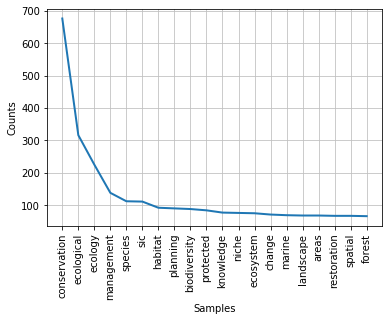

In [10]:
#Visualizing the most common keywords

fdist = FreqDist(cleaned_tokens)
    
    
fdist.plot(20)


# Most common words in abstracts

In [11]:
abstract=data['Abstract']

word_dat=[] ##creating a list to store string of data

for item in abstract:  #Make everything in the column  a string of text
    string=str(item)
    word_dat.append(string)
    
len(word_dat)   
word_dat[1]

'Although many significant policies and legislation have been put forth by the Chinese government aiming toward ecological civilization for the aquatic environment, in practice, the situation is still undesirable. A pioneering multi-year study has since been conducted on the East Tiaoxi River (a major tributary of the renowned Yangtze River), focusing on fish distribution, influencing factors and habitat requirements, and river health as well. This revealed certain key species, hotspot protection areas, negative impacts of local anthropogenic activities, and inappropriate perceptions and practices of conservation and restoration. We found that not all fish species were equally conserved and that the supposedly ecological engineering measures were initiated without regard for ecological integrity. Our exemplary study appreciates scientific basis and truly ecological notion, and urgently advocates comprehensive and continuous basin-scale scientific investigation of fish biodiversity, and

In [12]:
tokens=nltk.word_tokenize(str(word_dat)) ##tokenize all of the text strings
len(tokens)

#There are currently 269,378 tokens

cleaned_tokens=[] ##Space to store clean tokens

for w in tokens:
        if w not in sw and w.isalpha(): #Removing tokens including stopwords and punctuation
            cleaned_tokens.append(w.lower())    ##Make everything lowercase


In [13]:
len(cleaned_tokens)
##there are now 148,105 tokens
cleaned_tokens[1:20]

['animals',
 'must',
 'select',
 'sites',
 'rest',
 'may',
 'spend',
 'large',
 'portion',
 'lives',
 'despite',
 'importance',
 'period',
 'daily',
 'activity',
 'budget',
 'lack',
 'information',
 'ecology']

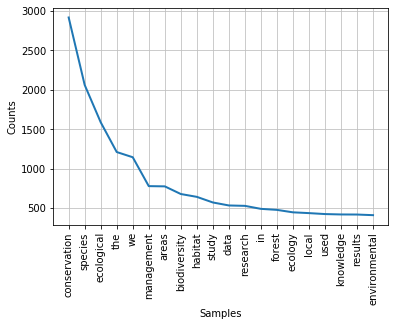

In [15]:
fdist = FreqDist(cleaned_tokens)
    
    
fdist.plot(20)

## Removing words that appear with very large frequency and very low frequency
There are a lot of words that have a high frequency given we only have 1,000 abstracts. I want to see what will happen with topic models with every word in the model and with high frequency words removed. I want to see what makes abstracts unique. Therefore, I want to try removing words that appear more than 1,000 times and less than 10 times.

In [14]:
# using Counter() + list comprehension

removed=[]
upper=1000
lower=10

freq=Counter(cleaned_tokens)
freq

filtered_tokens= [ele for ele in cleaned_tokens if freq[ele] < upper]
filtered2_tokens= [ele for ele in filtered_tokens if freq[ele] > lower]
#Counter(filtered2_tokens)

In [15]:
#removed words
removed=[ele for ele in cleaned_tokens if freq[ele] > upper]
removed.append([ele for ele in cleaned_tokens if freq[ele] < lower])

In [16]:
#removed

## Looking at common bigrams (pairs of words)

In [17]:
from nltk import word_tokenize 
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
bigrams=[]

for abstract in word_dat:
    tokens = word_tokenize(abstract)
    tokens = [t for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    bi_grams = list(ngrams(tokens, 2))
    
    
    bigrams.append(bi_grams)

len(bigrams)
#bigrams ##currently bigrams is a list of lists of bigrams

1000

In [18]:
# how to flatten list of lists
 
# using list comprehension
all_bigrams = [item for sublist in bigrams for item in sublist]
all_bigrams

# counting all bigrams
counter = Counter(all_bigrams)
counter.most_common(30)
#counter

[(('protected', 'area'), 215),
 (('biodiversity', 'conservation'), 163),
 (('climate', 'change'), 163),
 (('ecosystem', 'service'), 145),
 (('The', 'result'), 122),
 (('conservation', 'planning'), 97),
 (('This', 'study'), 96),
 (('conservation', 'management'), 90),
 (('case', 'study'), 89),
 (('We', 'found'), 88),
 (('Our', 'result'), 87),
 (('ecological', 'conservation'), 78),
 (('conservation', 'strategy'), 77),
 (('We', 'used'), 76),
 (('ecological', 'niche'), 75),
 (('land', 'use'), 73),
 (('conservation', 'effort'), 71),
 (('ecological', 'knowledge'), 69),
 (('conservation', 'status'), 69),
 (('specie', 'richness'), 66),
 (('water', 'conservation'), 65),
 (('Published', 'Elsevier'), 64),
 (('conservation', 'action'), 63),
 (('In', 'addition'), 62),
 (('human', 'activity'), 60),
 (('We', 'also'), 59),
 (('natural', 'resource'), 59),
 (('In', 'study'), 57),
 (('study', 'area'), 57),
 (('conservation', 'area'), 56)]

In [19]:
len(all_bigrams)

147693

In [21]:
##Removing some irrelevant bigrams

bad_bigrams=[('We', 'also'), ('In', 'study'),('In', 'addition'),('We', 'used'),('Published', 'Elsevier'),
('Our', 'result'),('We', 'found'),('The', 'result'),('This', 'study')]

clean_bigrams = []
for bigram in all_bigrams:
    if bigram not in bad_bigrams:
        clean_bigrams.append(bigram)

# Creating World Cloud Visualizations

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

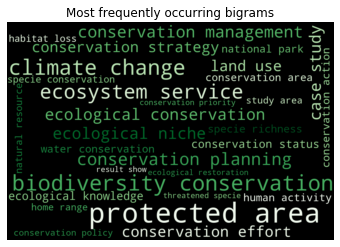

In [29]:

dictionary2 = [' '.join(tup) for tup in clean_bigrams]
#print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 30
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,colormap='Greens') #,stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigrams')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_bigram.jpg')

# Looking at trigrams


In [30]:
trigrams=[]

for abstract in word_dat:
    tokens = word_tokenize(abstract)
    tokens = [t for t in tokens if t not in sw]
    word_l = WordNetLemmatizer()
    tokens = [word_l.lemmatize(t) for t in tokens if t.isalpha()]

    tri_grams = list(ngrams(tokens, 3))
    
    
    trigrams.append(tri_grams)

len(trigrams)
#bigrams ##currently trigrams is a list of lists of trigrams

1000

In [31]:
# flatten list of lists
 
# using list comprehension
all_trigrams = [item for sublist in trigrams for item in sublist]
all_trigrams

# counting all bigrams
counter = Counter(all_trigrams)
counter.most_common(30)
#counter

[(('The', 'Authors', 'Published'), 34),
 (('Authors', 'Published', 'Elsevier'), 34),
 (('The', 'result', 'show'), 29),
 (('C', 'The', 'Authors'), 27),
 (('local', 'ecological', 'knowledge'), 24),
 (('ecological', 'niche', 'model'), 22),
 (('home', 'range', 'size'), 20),
 (('soil', 'water', 'conservation'), 20),
 (('marine', 'protected', 'area'), 20),
 (('All', 'right', 'reserved'), 19),
 (('IUCN', 'Red', 'List'), 18),
 (('natural', 'resource', 'management'), 18),
 (('traditional', 'ecological', 'knowledge'), 17),
 (('Elsevier', 'All', 'right'), 16),
 (('The', 'result', 'showed'), 16),
 (('priority', 'conservation', 'area'), 15),
 (('specie', 'conservation', 'concern'), 14),
 (('C', 'Elsevier', 'All'), 14),
 (('play', 'important', 'role'), 14),
 (('Our', 'result', 'show'), 14),
 (('Our', 'result', 'suggest'), 14),
 (('The', 'result', 'study'), 14),
 (('Brasileira', 'de', 'Ciencia'), 13),
 (('de', 'Ciencia', 'Ecologica'), 13),
 (('Ciencia', 'Ecologica', 'e'), 13),
 (('ecological', 'niche

In [32]:
len(all_trigrams)

146696

In [35]:
bad_trigrams=[('Ciencia', 'Ecologica', 'e'),('de', 'Ciencia', 'Ecologica'),('Brasileira', 'de', 'Ciencia'),('The', 'result', 'study'),
             ('Our', 'result', 'suggest'),('Our', 'result', 'show'),('play', 'important', 'role'), ('Elsevier', 'All', 'right'),
             ('The', 'result', 'showed'),('All', 'right', 'reserved'),('C', 'The', 'Authors'),('The', 'Authors', 'Published'),
             ('Authors', 'Published', 'Elsevier'),('The', 'result', 'show')]

clean_trigrams = []
for trigram in all_trigrams:
    if trigram not in bad_trigrams:
        clean_trigrams.append(trigram)

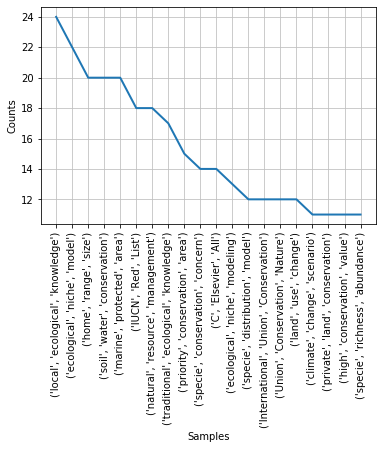

In [36]:
fdist = FreqDist(clean_trigrams)
    
    
fdist.plot(20)

In [37]:
dictionary3 = [' '.join(tup) for tup in clean_trigrams]

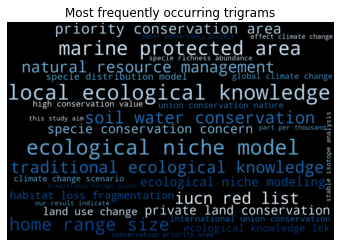

In [38]:
#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary3)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 30
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,colormap="Blues") #,stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring trigrams')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_trigram.jpg')

# How can I investigate methodology?

In [39]:
theories=[]

for trigram in clean_trigrams:
    if 'theory' in trigram:
        theories.append(trigram)
Counter(theories)

#This helps me see what theories have been mentioned in the sample of 1,000 abstracts

Counter({('resource', 'affect', 'theory'): 1,
         ('affect', 'theory', 'new'): 1,
         ('theory', 'new', 'materialism'): 1,
         ('In', 'order', 'theory'): 1,
         ('order', 'theory', 'ecological'): 1,
         ('theory', 'ecological', 'water'): 1,
         ('rational', 'coordination', 'theory'): 1,
         ('coordination', 'theory', 'paper'): 1,
         ('theory', 'paper', 'studied'): 1,
         ('hierarchical', 'organization', 'theory'): 1,
         ('organization', 'theory', 'conceptual'): 1,
         ('theory', 'conceptual', 'framework'): 1,
         ('paper', 'take', 'theory'): 1,
         ('take', 'theory', 'circular'): 1,
         ('theory', 'circular', 'economy'): 1,
         ('test', 'ecological', 'theory'): 1,
         ('ecological', 'theory', 'natural'): 1,
         ('theory', 'natural', 'ecosystem'): 1,
         ('implication', 'ecosystem', 'theory'): 1,
         ('ecosystem', 'theory', 'conservation'): 1,
         ('theory', 'conservation', 'policy'): 1

# Creating a .gif of the bigram and trigram wordcloud

In [42]:
from pathlib import Path
import imageio
image_path = Path('source_images')
images = list(image_path.glob('*.jpg'))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

In [43]:
imageio.mimwrite('animated_from_images.gif', image_list, fps=1, duration=25)

In [44]:
#This created a super fast transition between the two images, but it's too fast. I changed the fps and duration to show one image eveery 25 seconds

# Latent Dirichlet Analysis (LDA)

Topic modelling discovers topics within a collection of documents. LDA is a specific topic model that classifies the text within a document into topics.

Latent Dirichlet Analysis with abstracts will look at all of the clean tokens and identify like words or phrases


In [45]:
from nltk.corpus import brown
from nltk.corpus import stopwords

import numpy as np
import pandas as pd

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS

from pprint import pprint
from collections import Counter, defaultdict

nlp = spacy.load('en_core_web_sm')

In [46]:
def lemmatizer(doc):
    # This takes in a doc of tokens from the NER and lemmatizes them. 
    # Pronouns (like "I" and "you" get lemmatized to '-PRON-', so I'm removing those.
    doc = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    doc = u' '.join(doc)
    return nlp.make_doc(doc)
    
def remove_stopwords(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

In [47]:
nlp.add_pipe(lemmatizer,name='lemmatizer',after='ner')
nlp.add_pipe(remove_stopwords, name="stopwords", last=True)

In [48]:
doc_list = []

# Iterates through each article in the corpus.
for doc in word_dat : #Reminder that word_dat is a list of the 1000 abstracts as text strings
    # Passes that abstract through the pipeline and adds to a new list.
    pr = nlp(doc)
    doc_list.append([t.lower() for t in pr if t.isalpha()])

In [49]:
# Create a mapping of word IDs to words.
words = corpora.Dictionary(doc_list)

# Turns each document into a bag of words.
corpus = [words.doc2bow(doc) for doc in doc_list]

## Fitting the LDA model

Now I am going to start fitting the model with different numbers of topics and passes to see which combination results in groupings of words that seem like they have things in common.

In [56]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=words,
                                           num_topics=5, 
                                           random_state=2,
                                           update_every=1,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

In [58]:
pprint(lda_model.print_topics(num_words=20))

[(0,
  '0.023*"ecological" + 0.014*"water" + 0.013*"conservation" + 0.012*"area" + '
  '0.011*"soil" + 0.009*"ecosystem" + 0.008*"use" + 0.007*"study" + '
  '0.006*"service" + 0.006*"increase" + 0.006*"result" + 0.006*"land" + '
  '0.005*"high" + 0.005*"change" + 0.005*"development" + 0.005*"model" + '
  '0.004*"project" + 0.004*"effect" + 0.004*"china" + 0.004*"vegetation"'),
 (1,
  '0.027*"conservation" + 0.015*"ecological" + 0.009*"social" + '
  '0.009*"management" + 0.006*"research" + 0.006*"local" + 0.006*"use" + '
  '0.006*"knowledge" + 0.006*"human" + 0.006*"biodiversity" + 0.006*"system" + '
  '0.005*"study" + 0.005*"community" + 0.005*"area" + 0.005*"approach" + '
  '0.005*"ecosystem" + 0.005*"wildlife" + 0.005*"policy" + '
  '0.004*"environmental" + 0.004*"ecology"'),
 (2,
  '0.024*"conservation" + 0.016*"specie" + 0.014*"use" + 0.011*"forest" + '
  '0.011*"habitat" + 0.010*"area" + 0.010*"ecological" + 0.008*"biodiversity" '
  '+ 0.008*"study" + 0.007*"land" + 0.007*"landsca

In [59]:
##Sample visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, words)

C:\Users\maddo\AnacondaInstall\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.118362  0.102784       1        1  31.914812
2      0.008029  0.045438       2        1  29.914152
4     -0.101810  0.002883       3        1  14.138431
3     -0.111597 -0.004590       4        1  13.802210
0      0.087017 -0.146515       5        1  10.230396, topic_info=    Category         Freq        Term        Total  loglift  logprob
166  Default  1678.000000      specie  1678.000000  30.0000  30.0000
126  Default  1695.000000  ecological  1695.000000  29.0000  29.0000
732  Default   334.000000       water   334.000000  28.0000  28.0000
136  Default   845.000000     habitat   845.000000  27.0000  27.0000
317  Default   441.000000      social   441.000000  26.0000  26.0000
..       ...          ...         ...          ...      ...      ...
686   Topic5    46.970322     climate   262.569885   0.5588  -5.7374
413   Topic5    46.784302     natural   272.717896   0.5169  -5.7414
139   Topic5    48.124645      impact   329.949310   0.3547  -5.7131
5     Topic5    47.071198        base   483.701630  -0.0500  -5.7352
681   Topic5    43.895916    analysis   305.636658   0.3392  -5.8051

[428 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5498      2  0.889485  acquisition
1410      1  0.991735        actor
1447      1  0.023513        adult
1447      2  0.070540        adult
1447      3  0.211621        adult
...     ...       ...          ...
1019      1  0.068628         zone
1019      2  0.098039         zone
1019      3  0.127451         zone
1019      4  0.264706         zone
1019      5  0.441177         zone

[873 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])

# Topic Modeling with Bigrams and Trigrams



In [50]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(word_dat))

len(data_words)

1000

In [51]:
## Working with bigrams and trigrams

bigram2 = gensim.models.Phrases(data_words, min_count=5,threshold=100)
trigram = gensim.models.Phrases(bigram2[data_words],threshold=100)

bigram_mod= gensim.models.phrases.Phraser(bigram2)

trigram_mod=gensim.models.phrases.Phraser(trigram)

 #trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['all', 'animals', 'must', 'select', 'sites', 'to', 'rest', 'and', 'may', 'spend', 'large', 'portion', 'of', 'their', 'lives', 'doing_so', 'despite', 'the', 'importance', 'of', 'this', 'period', 'in', 'their', 'daily', 'activity', 'budget', 'we', 'lack', 'information', 'about', 'rest', 'roost', 'ecology', 'for', 'most', 'animals', 'including', 'the', 'imperiled', 'lesser_prairie_chicken', 'tympanuchus', 'pallidicinctus', 'hereafter', 'lepc', 'therefore', 'we', 'sought', 'to', 'identify', 'how', 'landcover', 'anthropogenic', 'features', 'and', 'human', 'policy', 'presence', 'of', 'the', 'conservation', 'reserve', 'program', 'crp', 'influenced', 'roost', 'site_selection', 'and', 'movement', 'patterns', 'of', 'the', 'lepc', 'from', 'march', 'to', 'may', 'we', 'captured', 'and', 'fitted', 'gps', 'transmitters', 'to', 'lepcs', 'males', 'females', 'within', 'beaver', 'county', 'oklahoma', 'and', 'recorded', 'two', 'nocturnal', 'locations', 'per', 'hour', 'period', 'annually', 'we', 'used', '

In [52]:
# # Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
     return [[word for word in simple_preprocess(str(doc)) if word not in sw] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [53]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


#data_words_bigrams[0]

In [54]:
# # Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


data_lemmatized = []

# # # Iterates through each article in the corpus.
for doc in data_words_bigrams : #Reminder that word_dat is a list of the 1000 abstracts as text strings
#    Passes that abstract through the pipeline and adds to a new list.
    pr = nlp(str(doc))
    data_lemmatized.append([t.lower() for t in pr]) #####LEFT OUT is.alpha(), IT TAKES AWAY BIGRAMS FOR HAVING UNDERSCORE



print(data_lemmatized[0])

['animal', 'select', 'site', 'rest', 'spend', 'large', 'portion', 'live', 'despite', 'importance', 'period', 'daily', 'activity', 'budget', 'lack', 'information', 'rest', 'roost', 'ecology', 'animal', 'include', 'imperil', 'lesser_prairie', 'chicken', 'tympanuchus', 'pallidicinctus', 'lepc', 'seek', 'identify', 'landcover', 'anthropogenic', 'feature', 'human', 'policy', 'presence', 'conservation', 'reserve', 'program', 'crp', 'influence', 'roost', 'site_selection', 'movement', 'pattern', 'lepc', 'march', 'capture', 'fit', 'gp', 'transmitter', 'lepc', 'male', 'female', 'beaver', 'county', 'oklahoma', 'record', 'nocturnal', 'location', 'hour', 'period', 'annually', 'use', 'discrete', 'choice', 'model', 'generalized_linear', 'mixed', 'effect', 'model', 'determine', 'vegetation', 'cover', 'crp', 'patch', 'anthropogenic', 'feature', 'influence', 'roost', 'site_selection', 'movement', 'roosting', 'site', 'respectively', 'find', 'roost', 'site', 'close', 'crp', 'lek', 'cropland', 'expect', 'r

In [55]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
#print(corpus[:1])

In [45]:
# lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=words2,
#                                            num_topics=4, 
#                                            random_state=2,
#                                            update_every=1,
#                                            passes=50,
#                                            alpha='auto',
#                                            per_word_topics=True)

# Build LDA model
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

In [46]:
pprint(lda_model_2.print_topics(num_words=10))

[(0,
  '0.028*"conservation" + 0.021*"ecological" + 0.013*"use" + 0.011*"area" + '
  '0.009*"management" + 0.009*"biodiversity" + 0.007*"study" + '
  '0.007*"ecosystem" + 0.006*"land" + 0.006*"approach"'),
 (1,
  '0.043*"specie" + 0.015*"habitat" + 0.010*"population" + 0.009*"use" + '
  '0.009*"conservation" + 0.008*"study" + 0.008*"area" + 0.008*"distribution" '
  '+ 0.007*"high" + 0.007*"plant"'),
 (2,
  '0.011*"population" + 0.009*"wild" + 0.008*"wildlife" + 0.007*"knowledge" + '
  '0.007*"elephant" + 0.007*"fisher" + 0.006*"fishery" + 0.006*"local" + '
  '0.005*"predator" + 0.005*"livestock"'),
 (3,
  '0.023*"conservation" + 0.013*"research" + 0.011*"knowledge" + '
  '0.010*"ecology" + 0.008*"wildlife" + 0.008*"community" + 0.007*"social" + '
  '0.007*"science" + 0.006*"practice" + 0.006*"understand"')]


In [54]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model_2, corpus, id2word)

C:\Users\maddo\AnacondaInstall\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.169458 -0.030037       1        1  49.466080
1      0.114280  0.162211       2        1  31.040230
3     -0.024410 -0.203150       3        1  14.045737
2     -0.259327  0.070977       4        1   5.447952, topic_info=    Category         Freq          Term        Total  loglift  logprob
167  Default  2045.000000        specie  2045.000000  30.0000  30.0000
13   Default  2785.000000  conservation  2785.000000  29.0000  29.0000
481  Default   572.000000    population   572.000000  28.0000  28.0000
426  Default   496.000000      research   496.000000  27.0000  27.0000
136  Default   848.000000       habitat   848.000000  26.0000  26.0000
..       ...          ...           ...          ...      ...      ...
38    Topic4    30.093401         human   405.709778   0.3086  -5.5296
852   Topic4    22.469336       density    80.643791   1.6320  -5.8217
851   Topic4    24.397457       decline   160.671616   1.0250  -5.7394
132   Topic4    22.839632          fish   172.215240   0.8897  -5.8054
167   Topic4    25.322119        specie  2045.029907  -1.4816  -5.7022

[283 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
438       2  0.897004  abundance
438       4  0.097175  abundance
642       1  0.994231    achieve
1402      1  0.244873      actor
1402      3  0.752111      actor
...     ...       ...        ...
915       4  0.938461       wolf
2406      3  0.979544      woman
324       1  0.342308       work
324       2  0.108537       work
324       3  0.542683       work

[402 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [47]:
##Evaluating the model

# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_2 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_2)


Perplexity:  -7.6079018607011655

Coherence Score:  0.3719135562911602


In [48]:
lda_model_3=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model_3.print_topics(num_words=20))

[(0,
  '0.028*"conservation" + 0.024*"ecological" + 0.015*"use" + 0.012*"area" + '
  '0.010*"biodiversity" + 0.010*"management" + 0.008*"study" + '
  '0.008*"ecosystem" + 0.007*"forest" + 0.007*"landscape" + 0.007*"land" + '
  '0.006*"identify" + 0.006*"model" + 0.006*"change" + 0.006*"approach" + '
  '0.006*"base" + 0.005*"result" + 0.005*"provide" + 0.005*"protect" + '
  '0.005*"impact"'),
 (1,
  '0.048*"specie" + 0.016*"habitat" + 0.011*"population" + '
  '0.009*"distribution" + 0.008*"study" + 0.008*"use" + 0.008*"area" + '
  '0.008*"plant" + 0.007*"high" + 0.006*"conservation" + 0.006*"range" + '
  '0.006*"niche" + 0.005*"community" + 0.005*"forest" + 0.005*"site" + '
  '0.005*"datum" + 0.005*"diversity" + 0.005*"genetic" + 0.004*"bird" + '
  '0.004*"model"'),
 (2,
  '0.018*"population" + 0.012*"specie" + 0.012*"wild" + 0.007*"fish" + '
  '0.007*"predator" + 0.007*"fisher" + 0.006*"prey" + 0.006*"fishery" + '
  '0.005*"animal" + 0.005*"carnivore" + 0.005*"livestock" + 0.004*"shark

In [57]:
##Evaluating the model

# Compute Perplexity
print('\nPerplexity: ', lda_model_3.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_3, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_3 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_3)


Perplexity:  -7.616885402468258

Coherence Score:  0.3575420332133166


In [56]:
lda_model_4=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model_4.print_topics(num_words=20))

[(0,
  '0.020*"specie" + 0.020*"ecological" + 0.015*"use" + 0.012*"forest" + '
  '0.012*"high" + 0.010*"water" + 0.010*"area" + 0.010*"study" + 0.010*"model" '
  '+ 0.009*"habitat" + 0.009*"plant" + 0.009*"result" + 0.008*"conservation" + '
  '0.007*"land" + 0.006*"value" + 0.006*"increase" + 0.006*"niche" + '
  '0.006*"diversity" + 0.005*"environmental" + 0.005*"change"'),
 (1,
  '0.039*"specie" + 0.026*"area" + 0.023*"distribution" + 0.020*"habitat" + '
  '0.014*"range" + 0.010*"protect" + 0.009*"bat" + 0.008*"endemic" + '
  '0.006*"record" + 0.006*"seed" + 0.006*"threaten" + 0.006*"km" + '
  '0.006*"predict" + 0.006*"suitable" + 0.005*"potential" + 0.005*"vulture" + '
  '0.005*"high" + 0.005*"status" + 0.005*"spring" + 0.005*"priority"'),
 (2,
  '0.069*"specie" + 0.036*"population" + 0.017*"habitat" + 0.014*"genetic" + '
  '0.011*"datum" + 0.008*"decline" + 0.007*"threaten" + 0.007*"abundance" + '
  '0.007*"information" + 0.007*"ecology" + 0.006*"wild" + 0.006*"bird" + '
  '0.006*"r

In [58]:
##Evaluating the model

# Compute Perplexity
print('\nPerplexity: ', lda_model_4.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_4, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_4 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_4)


Perplexity:  -7.647482741196246

Coherence Score:  0.4088330272899618


In [63]:
lda_model_7=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model_7.print_topics(num_words=20))

[(0,
  '0.024*"ecological" + 0.013*"use" + 0.013*"water" + 0.011*"specie" + '
  '0.010*"plant" + 0.009*"land" + 0.009*"high" + 0.009*"result" + '
  '0.009*"study" + 0.008*"model" + 0.007*"area" + 0.007*"value" + '
  '0.007*"forest" + 0.007*"increase" + 0.007*"conservation" + '
  '0.006*"environmental" + 0.006*"change" + 0.005*"soil" + 0.005*"effect" + '
  '0.005*"niche"'),
 (1,
  '0.057*"specie" + 0.027*"habitat" + 0.016*"area" + 0.015*"distribution" + '
  '0.010*"range" + 0.009*"population" + 0.009*"high" + 0.008*"use" + '
  '0.008*"study" + 0.008*"site" + 0.007*"forest" + 0.007*"nest" + 0.006*"bird" '
  '+ 0.005*"threaten" + 0.005*"datum" + 0.005*"status" + 0.005*"record" + '
  '0.005*"survey" + 0.005*"endemic" + 0.005*"model"'),
 (2,
  '0.040*"specie" + 0.032*"population" + 0.022*"genetic" + 0.008*"wild" + '
  '0.007*"fish" + 0.007*"datum" + 0.006*"decline" + 0.005*"habitat" + '
  '0.005*"structure" + 0.005*"density" + 0.005*"adult" + 0.005*"prey" + '
  '0.005*"trait" + 0.004*"ecolo

In [64]:
##Evaluating the model

# Compute Perplexity
print('\nPerplexity: ', lda_model_7.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_7, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_7 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_7)


Perplexity:  -7.644778436776504

Coherence Score:  0.384499020196191


In [65]:
pyLDAvis.enable_notebook()
visualization=pyLDAvis.gensim.prepare(lda_model_7, corpus, id2word)
pyLDAvis.save_html(visualization, 'LDAModel_k7.html')

C:\Users\maddo\AnacondaInstall\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [59]:
lda_model_5=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=50,
                                           alpha='auto',
                                           per_word_topics=True)

pprint(lda_model_5.print_topics(num_words=20))

[(0,
  '0.031*"ecological" + 0.014*"land" + 0.013*"use" + 0.013*"conservation" + '
  '0.013*"water" + 0.013*"area" + 0.010*"study" + 0.010*"increase" + '
  '0.010*"result" + 0.010*"value" + 0.009*"high" + 0.008*"model" + '
  '0.008*"forest" + 0.007*"effect" + 0.007*"analysis" + 0.007*"change" + '
  '0.006*"development" + 0.006*"environmental" + 0.006*"soil" + 0.005*"base"'),
 (1,
  '0.036*"occupancy" + 0.028*"sleep" + 0.016*"butterfly" + 0.012*"riparian" + '
  '0.010*"perch" + 0.010*"gibbon" + 0.009*"seagrass" + 0.008*"avian" + '
  '0.008*"wtpd" + 0.007*"langur" + 0.006*"rail" + 0.006*"prescribed_burne" + '
  '0.005*"delineation" + 0.005*"patch_size" + 0.005*"eurasian" + '
  '0.004*"nearshore" + 0.004*"agglomeration" + 0.004*"macaque" + '
  '0.004*"myrmidone" + 0.004*"evergreen"'),
 (2,
  '0.016*"reef" + 0.015*"wild" + 0.015*"shark" + 0.014*"prey" + '
  '0.011*"forest_fragment" + 0.010*"scp" + 0.009*"ungulate" + 0.008*"platform" '
  '+ 0.008*"artificial" + 0.008*"ray" + 0.008*"govern" 

In [60]:
##Evaluating the model

# Compute Perplexity
print('\nPerplexity: ', lda_model_5.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_5, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_5 = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda_5)


Perplexity:  -7.835892789088208

Coherence Score:  0.48231833549430014


In [62]:
pyLDAvis.enable_notebook()
visualization=pyLDAvis.gensim.prepare(lda_model_5, corpus, id2word)
pyLDAvis.save_html(visualization, 'LDAModel.html')

C:\Users\maddo\AnacondaInstall\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


# Evaluating models for correct topic number:
https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

I HAVE NOT GOTTEN THIS CODE TO WORK YET: LOOKING FOR RECOMMENDATIONS!

In [51]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [55]:
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = 1000
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()




  0%|                                                                                          | 0/540 [00:00<?, ?it/s]

ValueError: Stop argument for islice() must be None or an integer: 0 <= x <= sys.maxsize.